In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

## load dataset

In [3]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('../data/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to ../data/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz
9920512it [00:03, 2994039.30it/s]
Extracting ../data/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST_data/MNIST/raw
0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to ../data/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz
32768it [00:00, 32951.98it/s]
0it [00:00, ?it/s]Extracting ../data/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST_data/MNIST/raw
1654784it [00:01, 1376506.90it/s]
0it [00:00, ?it/s]Extracting ../data/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST_data/MNIST/raw
8192it [00:00, 10919.22it/s]Extracting ../data/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST_data/MNIST/raw
Processing...
Done!



In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


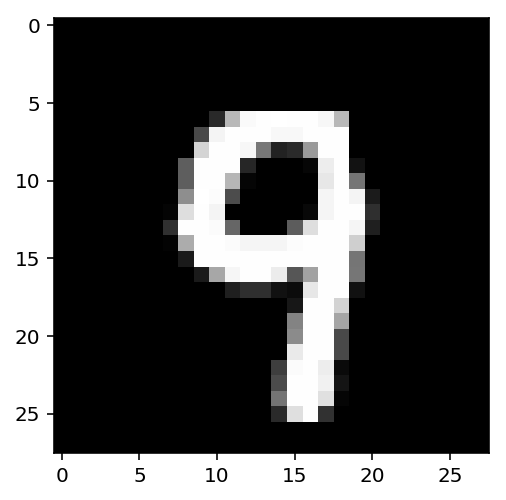

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [24]:
def activation(x):
    return 1 / (1+torch.exp(-x))

## Define forward(except nn module)

In [32]:
test = images[1]
print(len(images))
print(test.shape)
torch.flatten(test).shape

# input_img = torch.zeros(64, 784)

# for img in range(len(images)):
#     input_img[img] = torch.flatten(images[img])
# print(input_img.shape[1])

# flatten
input_img = images.view(images.shape[0], -1)

input_unit = input_img.shape[1]
hidden_unit = 256
output_unit = 10

W1 = torch.rand(input_unit, hidden_unit)
W2 = torch.rand(hidden_unit, output_unit)

B1 = torch.rand(hidden_unit)
B2 = torch.rand(output_unit)

64
torch.Size([1, 28, 28])


In [33]:
res_ith = activation(torch.mm(input_img, W1) + B1)
res_hto = torch.mm(res_ith, W2) + B2

In [35]:
# res_hto

In [61]:
(torch.exp(res_hto).view(res_hto.shape[1], res_hto.shape[0]) / sum(torch.exp(res_hto).view(res_hto.shape[1], res_hto.shape[0]))).T

tensor([[0.0819, 0.1135, 0.1025, 0.1317, 0.0704, 0.0819, 0.1135, 0.1025, 0.1317,
         0.0704],
        [0.1144, 0.0868, 0.0542, 0.1059, 0.1388, 0.1144, 0.0868, 0.0542, 0.1059,
         0.1388],
        [0.1317, 0.0704, 0.0819, 0.1135, 0.1025, 0.1317, 0.0704, 0.0819, 0.1135,
         0.1025],
        [0.1059, 0.1388, 0.1144, 0.0868, 0.0542, 0.1059, 0.1388, 0.1144, 0.0868,
         0.0542],
        [0.1135, 0.1025, 0.1317, 0.0704, 0.0819, 0.1135, 0.1025, 0.1317, 0.0704,
         0.0819],
        [0.0868, 0.0542, 0.1059, 0.1388, 0.1144, 0.0868, 0.0542, 0.1059, 0.1388,
         0.1144],
        [0.0704, 0.0819, 0.1135, 0.1025, 0.1317, 0.0704, 0.0819, 0.1135, 0.1025,
         0.1317],
        [0.1388, 0.1144, 0.0868, 0.0542, 0.1059, 0.1388, 0.1144, 0.0868, 0.0542,
         0.1059],
        [0.1025, 0.1317, 0.0704, 0.0819, 0.1135, 0.1025, 0.1317, 0.0704, 0.0819,
         0.1135],
        [0.0542, 0.1059, 0.1388, 0.1144, 0.0868, 0.0542, 0.1059, 0.1388, 0.1144,
         0.0868],
        [0

In [53]:
sum(torch.exp(res_hto))

tensor([ 96.4839, 136.1699, 155.0400, 126.0674, 133.5946, 103.2539,  82.8882,
        165.1745, 120.7021,  64.4550])

In [62]:
def softmax(x):
    # x -> array of output units
    return (torch.exp(x).T / sum(torch.exp(x).T)).T
    # another return torch.exp(x) / sum(torch.exp(x), dim=1).view(-1, 1)

In [65]:
res_hto = softmax(torch.mm(res_ith, W2) + B2)
print(res_hto.shape)
print(res_hto.sum(dim=1))

torch.Size([64, 10])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


## Define forward using nn module

In [66]:
from torch import nn

In [67]:
# case1
class Network_origin(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [ ]:
import torch.nn.functional as F

class Network_origin2(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [70]:
# add 1 more hidden & changed activation ftn to Relu
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 128)
        # Inputs to hidden layer linear transformation
        self.hidden2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [71]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [74]:
print(model.hidden.weight)
print(model.hidden.bias)

# For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

# Set biases to all zeros
model.hidden.bias.data.fill_(0)

Parameter containing:
tensor([[ 0.0311, -0.0215,  0.0315,  ...,  0.0076,  0.0074,  0.0153],
        [-0.0225,  0.0059, -0.0143,  ..., -0.0115, -0.0021,  0.0110],
        [ 0.0250, -0.0225,  0.0254,  ...,  0.0242,  0.0191, -0.0198],
        ...,
        [-0.0334, -0.0299,  0.0113,  ..., -0.0239,  0.0354, -0.0165],
        [ 0.0037,  0.0081,  0.0346,  ..., -0.0030, -0.0159,  0.0245],
        [ 0.0132,  0.0026, -0.0333,  ..., -0.0192,  0.0331,  0.0016]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0313, -0.0304, -0.0175,  0.0242, -0.0186, -0.0322,  0.0197, -0.0050,
         0.0096,  0.0098,  0.0252,  0.0175,  0.0211, -0.0318,  0.0215,  0.0119,
        -0.0266,  0.0240, -0.0023, -0.0049, -0.0350,  0.0296, -0.0160, -0.0330,
         0.0230,  0.0256, -0.0058,  0.0159,  0.0249,  0.0182, -0.0098,  0.0274,
         0.0228, -0.0310,  0.0343,  0.0160, -0.0249,  0.0024, -0.0087,  0.0310,
         0.0230,  0.0219,  0.0134,  0.0268,  0.0315, -0.0047,  0.0263, -0.0211,
         0.0225

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
# sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.01)

tensor([[ 0.0030, -0.0185, -0.0049,  ...,  0.0063,  0.0005, -0.0149],
        [ 0.0062, -0.0048, -0.0202,  ...,  0.0036,  0.0065,  0.0179],
        [-0.0018,  0.0032, -0.0126,  ..., -0.0090, -0.0075, -0.0081],
        ...,
        [-0.0092,  0.0094, -0.0084,  ...,  0.0140,  0.0125, -0.0088],
        [ 0.0014, -0.0033,  0.0030,  ..., -0.0082, -0.0201, -0.0150],
        [-0.0118,  0.0081,  0.0056,  ..., -0.0026,  0.0070,  0.0071]])

### Forward pass

Now that we have a network, let's see what happens when we pass in an image.

In [77]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
# helper.view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

### Using `nn.Sequential`

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)). Using this to build the equivalent network:

In [80]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
# helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


Here our model is the same as before: 784 input units, a hidden layer with 128 units, ReLU activation, 64 unit hidden layer, another ReLU, then the output layer with 10 units, and the softmax output.

The operations are available by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use `model[0]`.

In [81]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0195,  0.0356,  0.0324,  ..., -0.0051,  0.0312,  0.0316],
        [ 0.0256,  0.0122,  0.0030,  ...,  0.0101,  0.0196, -0.0284],
        [ 0.0290, -0.0231, -0.0084,  ..., -0.0102, -0.0224,  0.0085],
        ...,
        [-0.0048,  0.0228,  0.0044,  ...,  0.0181, -0.0215, -0.0186],
        [-0.0071,  0.0008, -0.0214,  ...,  0.0123,  0.0141,  0.0179],
        [-0.0129, -0.0093, -0.0203,  ..., -0.0138,  0.0106,  0.0017]],
       requires_grad=True)

You can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [82]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [83]:
# Now you can access layers either by integer or the name
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
